**ЛР 4**  
**Вариант 20**

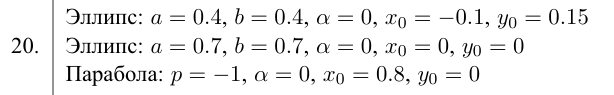

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import initializers
from keras import backend

import math
import itertools
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Уравнение эллипса в параметрическом виде.
def ellipse(t, a, b, x0, y0):
    x = x0 + a * np.cos(t)
    y = y0 + b * np.sin(t)
    return x, y
# Уравнение параболы в параметрическом виде.
def parabola(t, p, x0, y0):
    x = x0 + t ** 2 / (2. * p)
    y = y0 + t
    return x, y
# Функция вращения фигуры на заданный угол.
def rotate(x, y, alpha):
    xr = x * np.cos(alpha) - y * np.sin(alpha)
    yr = x * np.sin(alpha) + y * np.cos(alpha)
    return xr, yr

**Часть 1**

In [3]:
t = np.arange(0, 2 * np.pi, 0.001)

In [4]:
a1 = 0.4
b1 = 0.4
alpha1 = 0
x01 = -0.1
y01 = 0.15
ell1_x, ell1_y = ellipse(t, a1, b1, x01, y01)
ell1_x, ell1_y = rotate(ell1_x, ell1_y, alpha1)
ellipse1 = np.array(list(zip(ell1_x, ell1_y)))
print(len(ell1_x))
print(len(ellipse1))
ellipse1_val = [[1, 0, 0] for i in range(len(ellipse1))]
print(len(ellipse1_val))
ellipse1

6284
6284
6284


array([[0.3       , 0.15      ],
       [0.2999998 , 0.1504    ],
       [0.2999992 , 0.1508    ],
       ...,
       [0.29999904, 0.14912588],
       [0.29999972, 0.14952588],
       [0.29999999, 0.14992588]])

In [5]:
a2 = 0.7
b2 = 0.7
alpha2 = 0
x02 = 0
y02 = 0
ell2_x, ell2_y = ellipse(t, a2, b2, x02, y02)
ell2_x, ell2_y = rotate(ell2_x, ell2_y, alpha2)
ellipse2 = np.array(list(zip(ell2_x, ell2_y)))
print(len(ell2_x))
print(len(ellipse2))
ellipse2_val = [[0, 1, 0] for i in range(len(ellipse2))]
print(len(ellipse2_val))
ell2_x

6284
6284
6284


array([0.7       , 0.69999965, 0.6999986 , ..., 0.69999833, 0.69999951,
       0.69999999])

In [6]:
p = -1
alpha3 = 0
x03 = 0.8
y03 = 0
p_x, p_y = parabola(t, p, x03, y03)
p_x, p_y = rotate(p_x, p_y, alpha3)
par =  np.array(list(zip(p_x, p_y)))
print(len(p_x))
print(len(par))
par_val = [[0, 0, 1] for i in range(len(par))]
print(len(par_val))
par

6284
6284
6284


array([[ 8.00000000e-01,  0.00000000e+00],
       [ 7.99999500e-01,  1.00000000e-03],
       [ 7.99998000e-01,  2.00000000e-03],
       ...,
       [-1.89254805e+01,  6.28100000e+00],
       [-1.89317620e+01,  6.28200000e+00],
       [-1.89380445e+01,  6.28300000e+00]])

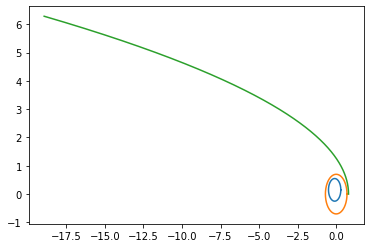

In [7]:
plt.plot(ell1_x, ell1_y)
plt.plot(ell2_x, ell2_y)
plt.plot(p_x, p_y)
plt.show()

In [8]:
x = np.linspace(-20, 3, 200)
y = np.linspace(-2, 8, 200)

Объединим в единое множество точек три фигуры

In [9]:
data = np.concatenate([ellipse1, ellipse2, par])
val = np.concatenate([ellipse1_val, ellipse2_val, par_val])
print(len(data))
print(len(val))
data

18852
18852


array([[  0.3      ,   0.15     ],
       [  0.2999998,   0.1504   ],
       [  0.2999992,   0.1508   ],
       ...,
       [-18.9254805,   6.281    ],
       [-18.931762 ,   6.282    ],
       [-18.9380445,   6.283    ]])

In [20]:
class RBFLayer(keras.layers.Layer):
    def __init__(self, output_dim, **kwargs):
        self.output_dim = output_dim
        super(RBFLayer, self).__init__(**kwargs)
    
    def build(self, input_shape):
        self.mu = self.add_weight(name = "mu",
                                  shape = (input_shape[1], self.output_dim),
                                  initializer = tf.keras.initializers.RandomUniform(minval = -1, maxval = 1),
                                  trainable = True)
        self.sigma = self.add_weight(name = "sigma",
                                     shape = (self.output_dim,),
                                     initializer = "random_normal",
                                     trainable = True)
        super(RBFLayer, self).build(input_shape)
    
    def call(self, inputs):
        diff = backend.expand_dims(inputs) - self.mu
        output = backend.exp(backend.sum(diff ** 2, axis = 1) * self.sigma)
        return output

In [21]:
model = keras.models.Sequential()

model.add(RBFLayer(3, input_dim = 2))
model.add(layers.Dense(3, activation = "sigmoid"))

model.compile(tf.keras.optimizers.SGD(0.01), 'mse', ['mae', 'accuracy'])

hist = model.fit(data, val, batch_size = 4, epochs = 50)

Epoch 1/50
4713/4713 [==============================] - 9s 2ms/step - loss: 0.2472 - mae: 0.4777 - accuracy: 0.2913
Epoch 2/50
4713/4713 [==============================] - 8s 2ms/step - loss: 0.1940 - mae: 0.4167 - accuracy: 0.6046
Epoch 3/50
4713/4713 [==============================] - 8s 2ms/step - loss: 0.1743 - mae: 0.3917 - accuracy: 0.6687
Epoch 4/50
4713/4713 [==============================] - 8s 2ms/step - loss: 0.1597 - mae: 0.3715 - accuracy: 0.7097
Epoch 5/50
4713/4713 [==============================] - 8s 2ms/step - loss: 0.1500 - mae: 0.3563 - accuracy: 0.7329
Epoch 6/50
4713/4713 [==============================] - 9s 2ms/step - loss: 0.1425 - mae: 0.3433 - accuracy: 0.7368
Epoch 7/50
4713/4713 [==============================] - 8s 2ms/step - loss: 0.1360 - mae: 0.3322 - accuracy: 0.7676
Epoch 8/50
4713/4713 [==============================] - 9s 2ms/step - loss: 0.1301 - mae: 0.3220 - accuracy: 0.7940
Epoch 9/50
4713/4713 [==============================] - 9s 2ms/step - lo

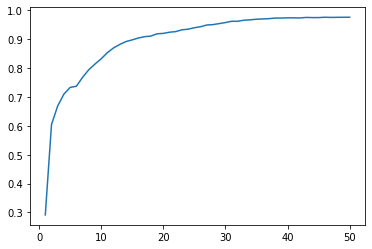

In [22]:
hist_x = [(i + 1) for i in range(len(hist.history["accuracy"]))]
plt.plot(hist_x, hist.history["accuracy"])

1250/1250 [==============================] - 2s 2ms/step


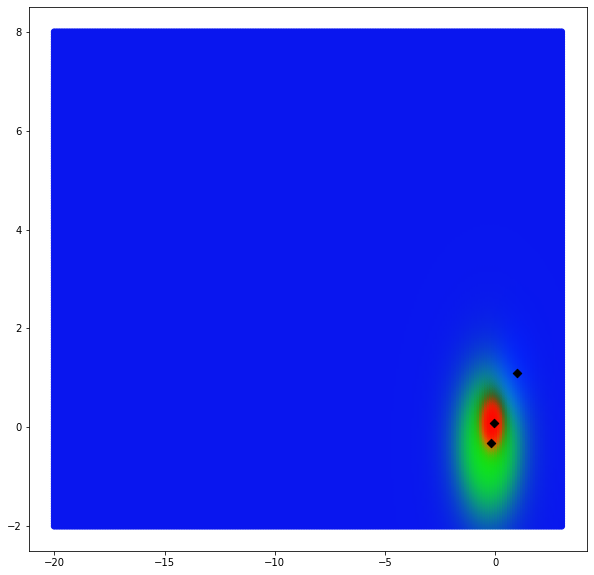

In [23]:
line = np.array(list(itertools.product(x, y)))
predictions = model.predict(line)

xs, ys = np.hsplit(line, 2)

plt.figure(figsize = (10, 10))
plt.scatter(xs, ys, c = predictions)

mu = model.get_layer(index = 0).get_weights()[0]
plt.scatter(mu[0], mu[1], color = "black", marker = "D")

plt.show()

**Часть 2**

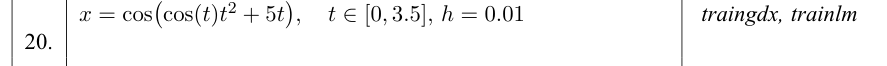

In [25]:
def f_t(t):
  return math.cos(math.cos(t) * t ** 2 + 5 * t)

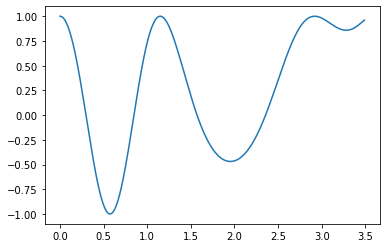

In [26]:
l2 = 0
r2 = 3.5
h2 = 0.01
t2 = np.arange(l2, r2, h2)
fs = [f_t(i) for i in t2]

plt.plot(t2, fs)
plt.show()

train2_x = []
train2_y = []

for i in range(t2.shape[0]):
    train2_x.append(t2[i])
    train2_y.append(fs[i])

In [47]:
class RBFLayerGen(keras.layers.Layer):
    def __init__(self, output_dim, **kwargs):
        self.output_dim = output_dim
        super(RBFLayerGen, self).__init__(**kwargs)
    
    def build(self, input_shape):
        self.mu = self.add_weight(name = "mu",
                                  shape = (input_shape[1], self.output_dim),
                                  initializer = tf.keras.initializers.RandomUniform(minval = 0, maxval = 3.5),
                                  trainable = True)
        self.sigma = self.add_weight(name = "sigma",
                                     shape = (self.output_dim,),
                                     initializer = "random_normal",
                                     trainable = True)
        self.sw = self.add_weight(name = "sw",
                                  shape = (self.output_dim,),
                                  initializer = "random_normal",
                                  trainable = True)
        super(RBFLayerGen, self).build(input_shape)
    
    def call(self, inputs):
        diff = backend.expand_dims(inputs) - self.mu
        output = backend.exp(backend.sum(diff ** 2, axis = 1) * self.sigma)
        output = output * self.sw
        return output

In [52]:
model2 = tf.keras.models.Sequential()
model2.add(RBFLayerGen(35, input_dim = 1))
model2.add(layers.Dense(16, 
                       activation = "relu"))
model2.add(layers.Dense(15, 
                       activation = "tanh"))
model2.add(layers.Dense(1, 
                       activation = "tanh"))

model2.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.051), loss = "mse", metrics = ["mae"])
history = model2.fit(train2_x, train2_y, batch_size = 4, epochs = 100, shuffle = True)

Epoch 1/100
88/88 [==============================] - 1s 2ms/step - loss: 0.3634 - mae: 0.5214
Epoch 2/100
88/88 [==============================] - 0s 2ms/step - loss: 0.2874 - mae: 0.4317
Epoch 3/100
88/88 [==============================] - 0s 2ms/step - loss: 0.2760 - mae: 0.4143
Epoch 4/100
88/88 [==============================] - 0s 2ms/step - loss: 0.2679 - mae: 0.3990
Epoch 5/100
88/88 [==============================] - 0s 2ms/step - loss: 0.2566 - mae: 0.3850
Epoch 6/100
88/88 [==============================] - 0s 2ms/step - loss: 0.2485 - mae: 0.3701
Epoch 7/100
88/88 [==============================] - 0s 2ms/step - loss: 0.2445 - mae: 0.3657
Epoch 8/100
88/88 [==============================] - 0s 2ms/step - loss: 0.2121 - mae: 0.3279
Epoch 9/100
88/88 [==============================] - 0s 2ms/step - loss: 0.1804 - mae: 0.2991
Epoch 10/100
88/88 [==============================] - 0s 2ms/step - loss: 0.1542 - mae: 0.2937
Epoch 11/100
88/88 [==============================] - 0s 2m

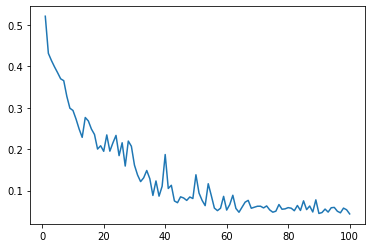

In [53]:
hist2_x = [(i + 1) for i in range(len(history.history["mae"]))]
plt.plot(hist2_x, history.history["mae"])

2/2 [==============================] - 0s 9ms/step


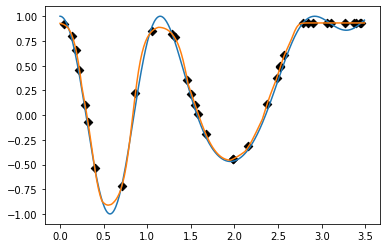

In [54]:
prediction2 = model2.predict(t2)

mu = model2.get_layer(index = 0).get_weights()[0][0]
plt.scatter(mu, model2.predict(mu), color = "black", marker = "D")

plt.plot(t2, fs)
plt.plot(t2, prediction2)
plt.show()